# Analyzing Portfolio Risk and Return

This application evaluates four new investment options for inclusion in a client portfolios. It determines the the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.



### Import the Data

#### Import the required libraries and dependencies.

In [38]:
# Import Pandas library
import pandas as pd

# Import the NumPy library
import numpy as np

# Import the Path module from the pathlib library
from pathlib import Path

# Import the matplotlib inline dependency
%matplotlib inline


#### Read the `whale_navs.csv` file into a Pandas DataFrame.

In [8]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame

whale_navs_df = pd.read_csv(
    Path("Resources/whale_navs.csv"), 
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the 'tech_df' DataFrame with both the head & tail functions
whale_navs_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Create the daily returns DataFrame based on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index.

In [159]:
# Convert the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.

daily_returns_df = whale_navs_df.pct_change().dropna()

daily_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Visualize the daily return data of the four fund portfolios and the S&P 500.

<AxesSubplot:title={'center':'Daily Returns of Portfolios and S&P 500'}, xlabel='date'>

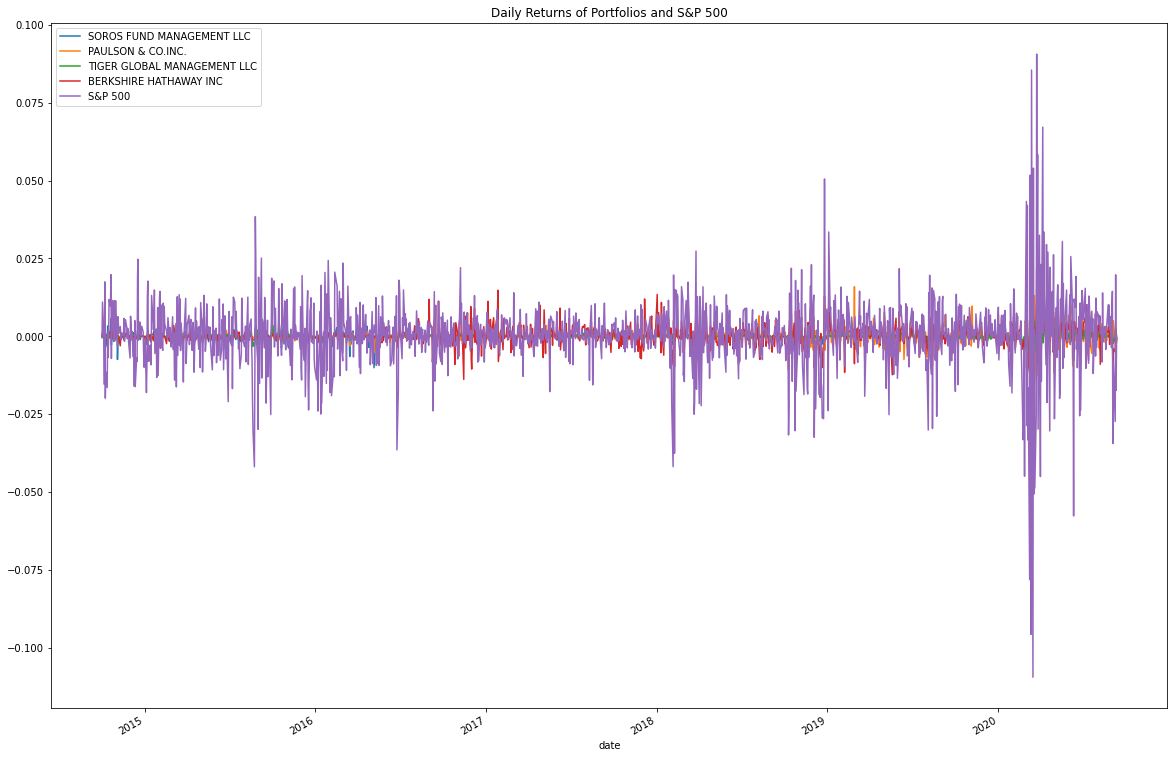

In [13]:
# Plot the daily return data of the 4 funds and the S&P 500 

daily_returns_df.plot(title="Daily Returns of Portfolios and S&P 500",figsize=(20,14))


#### Calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame.

In [30]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame

cum_returns_df = (1 + daily_returns_df).cumprod()

cum_returns_df.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Visualize the cumulative return values for the four funds and the S&P 500 over time.

<AxesSubplot:title={'center':'Cumulative Daily Returns of Portfolios and S&P 500'}, xlabel='date'>

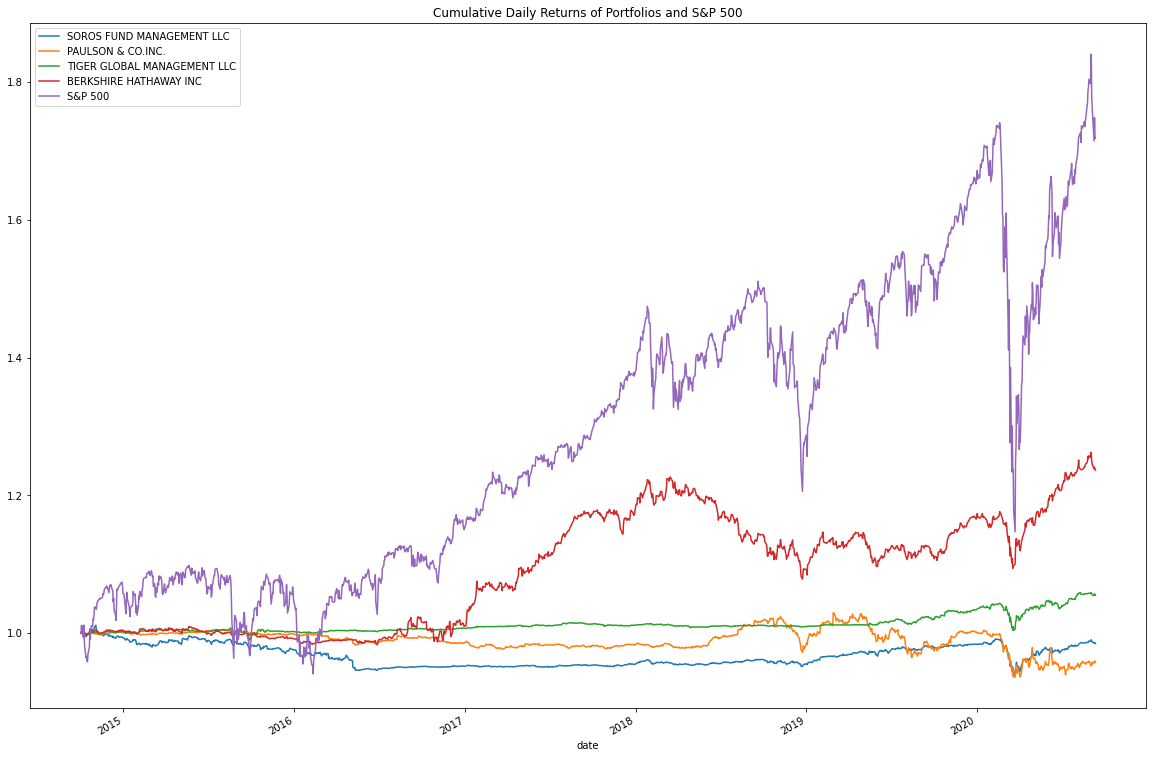

In [21]:
# Visualize the cumulative returns using the Pandas plot function

cum_returns_df.plot(title="Cumulative Daily Returns of Portfolios and S&P 500",figsize=(20,14))


**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # No.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

<AxesSubplot:title={'center':'Daily Returns Volatility of Portfolios and S&P 500'}>

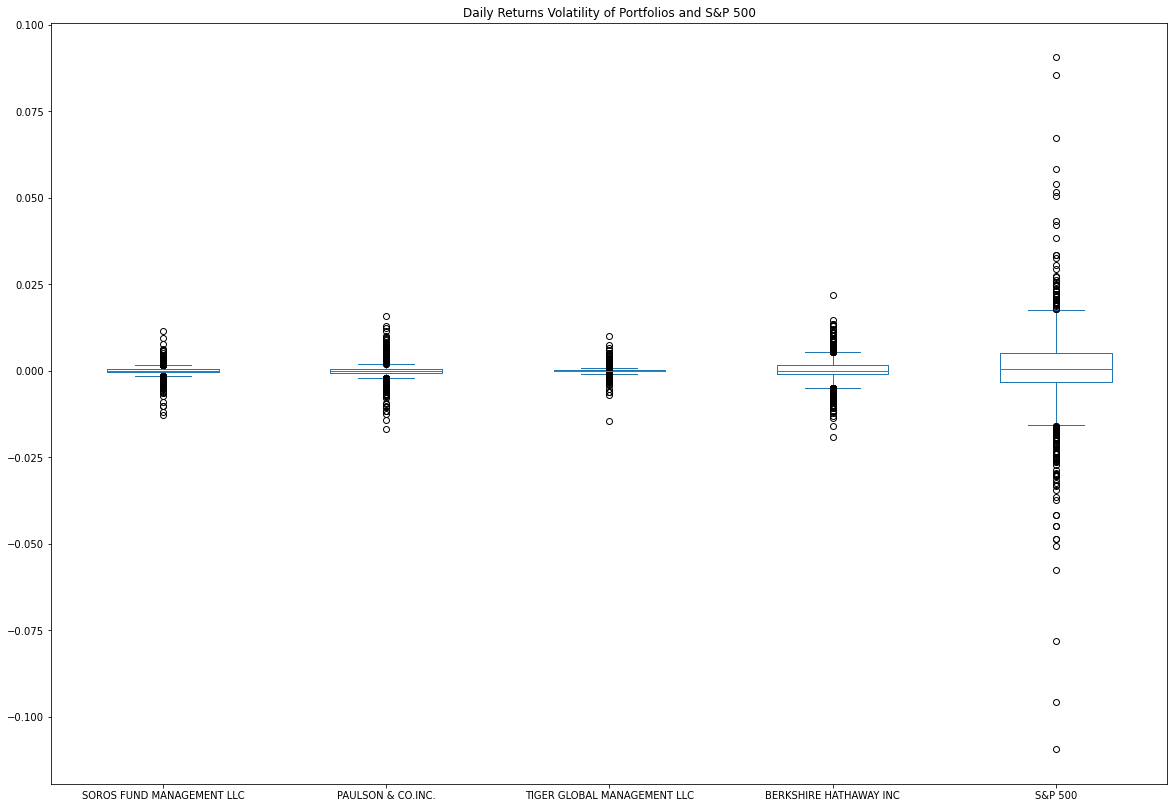

In [20]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 

daily_returns_df.plot(title="Daily Returns Volatility of Portfolios and S&P 500",figsize=(20,14),kind="box")


<AxesSubplot:title={'center':'Daily Returns Volatility of Portfolios'}>

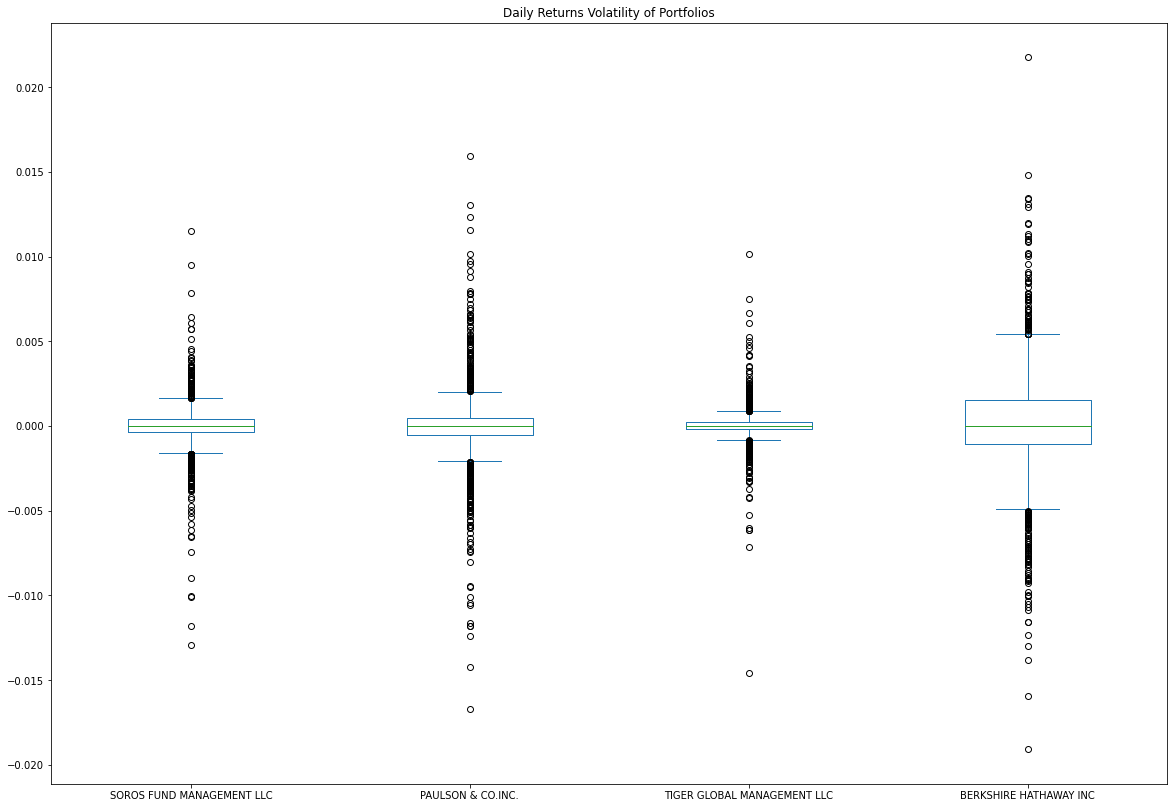

In [25]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios

daily_returns_4_portfolios_df = daily_returns_df.drop(columns=["S&P 500"])

daily_returns_4_portfolios_df.plot(title="Daily Returns Volatility of Portfolios",figsize=(20,14),kind="box")


**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # Greatest Spread (most volatile): Berkshire Hathaway Inc, Smallest Spread (least volatile): Tiger Global Management LLC

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [35]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest

daily_returns_std_df = daily_returns_df.std().sort_values()

daily_returns_std_df


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [40]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest

annual_std_df = daily_returns_std_df * np.sqrt(252)

annual_std_df.sort_values()




TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviations of Portfolios and S&P 500'}, xlabel='date'>

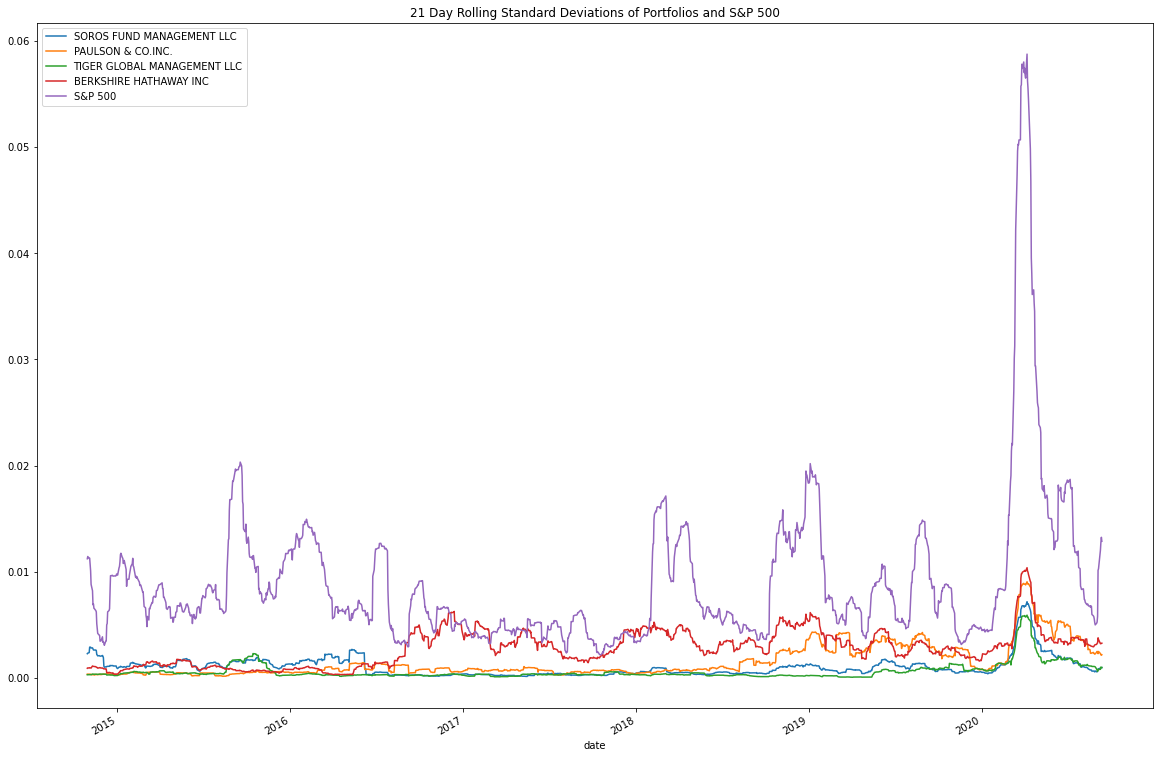

In [46]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500

daily_returns_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviations of Portfolios and S&P 500",figsize=(20,14))


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviations of 4 Portfolios'}, xlabel='date'>

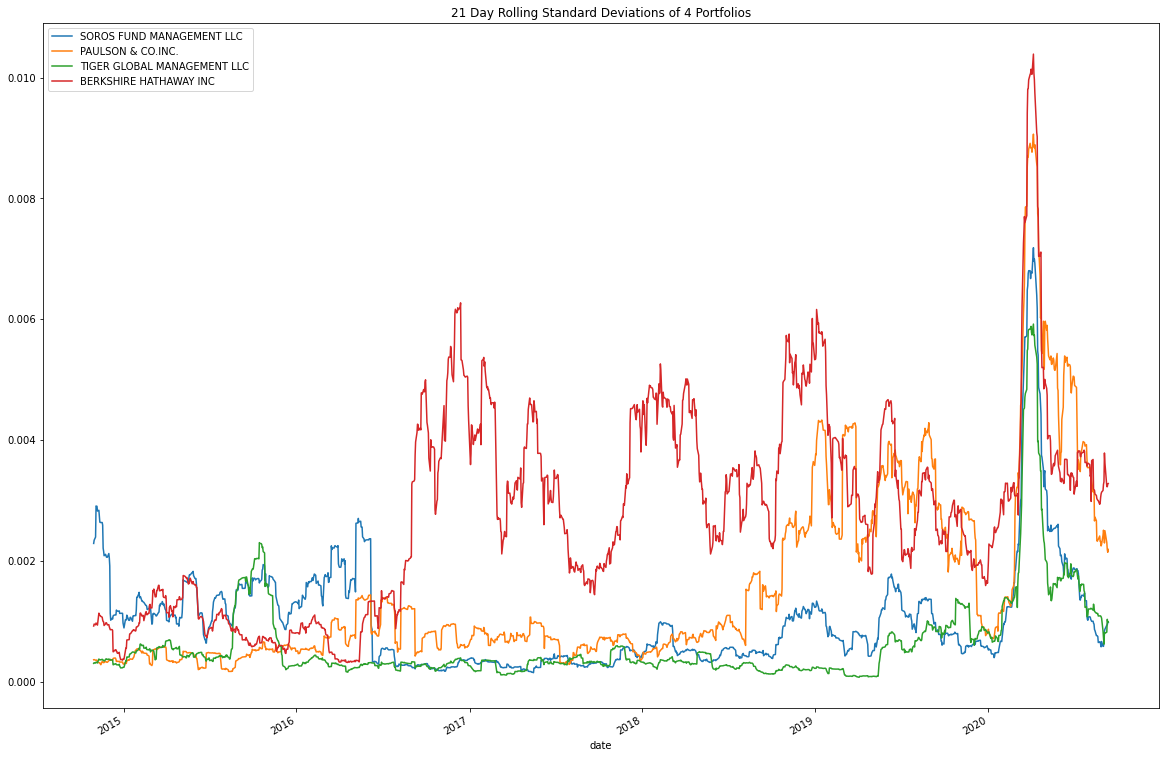

In [47]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size

daily_returns_4_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviations of 4 Portfolios",figsize=(20,14))


**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # None of them

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # No, there are several periods like late 2016 and early 2018 where the risk of the S&P 500 deviates substantially, but the portfolio risks either remain flat or even decrease.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # In 2015 and early 2016, the Soros Fund poses the most risk. This changes around late 2016 to where Berkshire Hathaway poses the most risk, and this remains roughly true through the end of the analyss period.

---

### Analyze the Risk-Return Profile


In [58]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest

anuualized_returns_df = daily_returns_df.mean() * 252

anuualized_returns_df.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [64]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest

annualized_std_df = daily_returns_df.std() * np.sqrt(252)

sharp_ratio_df = anuualized_returns_df / annualized_std_df

sharp_ratio_df.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios of 4 Portfolios and S&P 500'}>

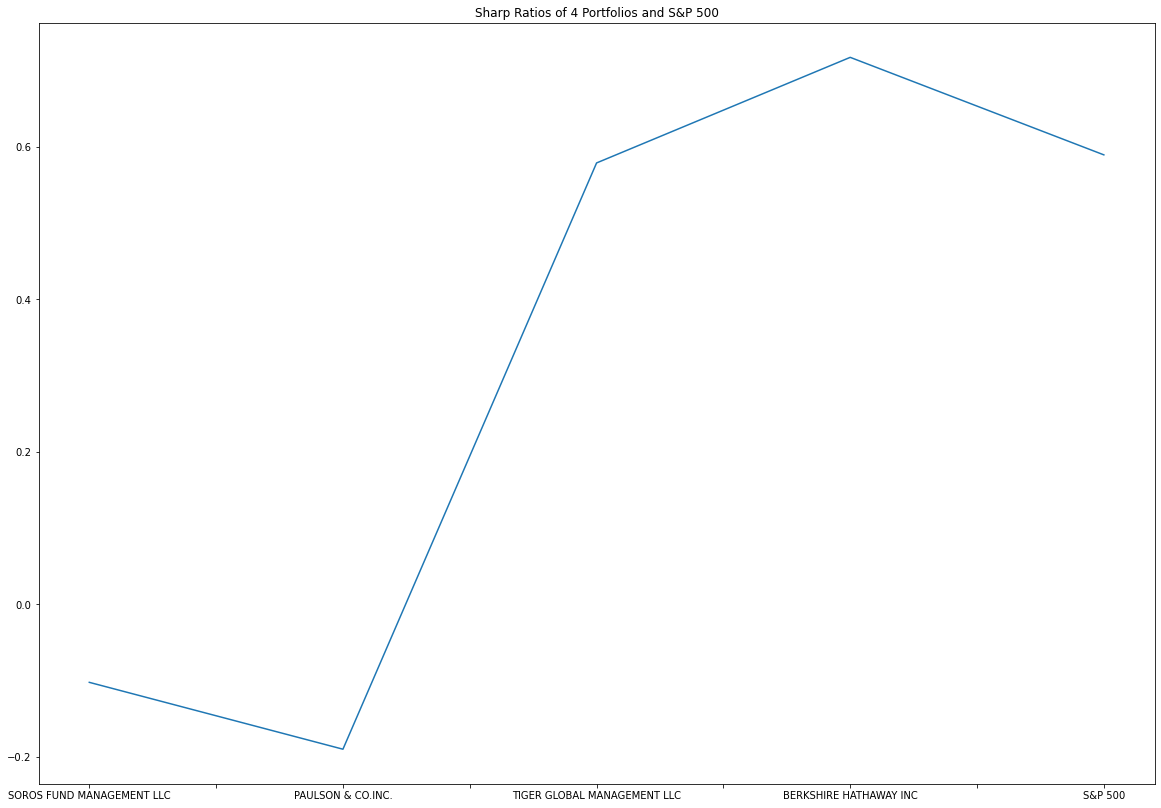

In [63]:
# Visualize the Sharpe ratios as a bar chart

sharp_ratio_df.plot(title="Sharp Ratios of 4 Portfolios and S&P 500",figsize=(20,14))


**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Paulson & Co offers the worst risk-return profile. Berkshire Hathaway offers the best.

---

### Diversify the Portfolio


In [171]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.

sp500_daily_returns = whale_navs_df["S&P 500"].pct_change().dropna()

sp500_variance = sp500_daily_returns.rolling(window=60).var()

sp500_variance

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, Length: 1497, dtype: float64

In [211]:
# Calculate the covariance using a 60-day rolling window of the Paulson portfolio
# Review the last five rows of the covariance data

paulson_daily_returns = whale_navs_df["PAULSON & CO.INC."].pct_change().dropna()

paulson_variance = paulson_daily_returns.var()

paulson_covariance = paulson_daily_returns.rolling(window=60).var().cov(whale_navs_df["S&P 500"])

paulson_covariance

0.0001795208368824685

In [210]:
# Calculate the beta of the Paulson portfolio based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information

paulson_beta = (paulson_daily_returns.rolling(window=60).var().cov(whale_navs_df["S&P 500"])) / sp500_variance

paulson_beta.tail()


date
2020-09-04    1.746280
2020-09-08    1.553486
2020-09-09    1.494694
2020-09-10    1.486974
2020-09-11    1.492839
Name: S&P 500, dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [199]:
# Calculate the average of the 60-day rolling beta

paulson_beta_average = paulson_beta.mean()

paulson_beta_average


4.037439652801396

<AxesSubplot:title={'center':'60 Day Rolling Beta for Paulson'}, xlabel='date'>

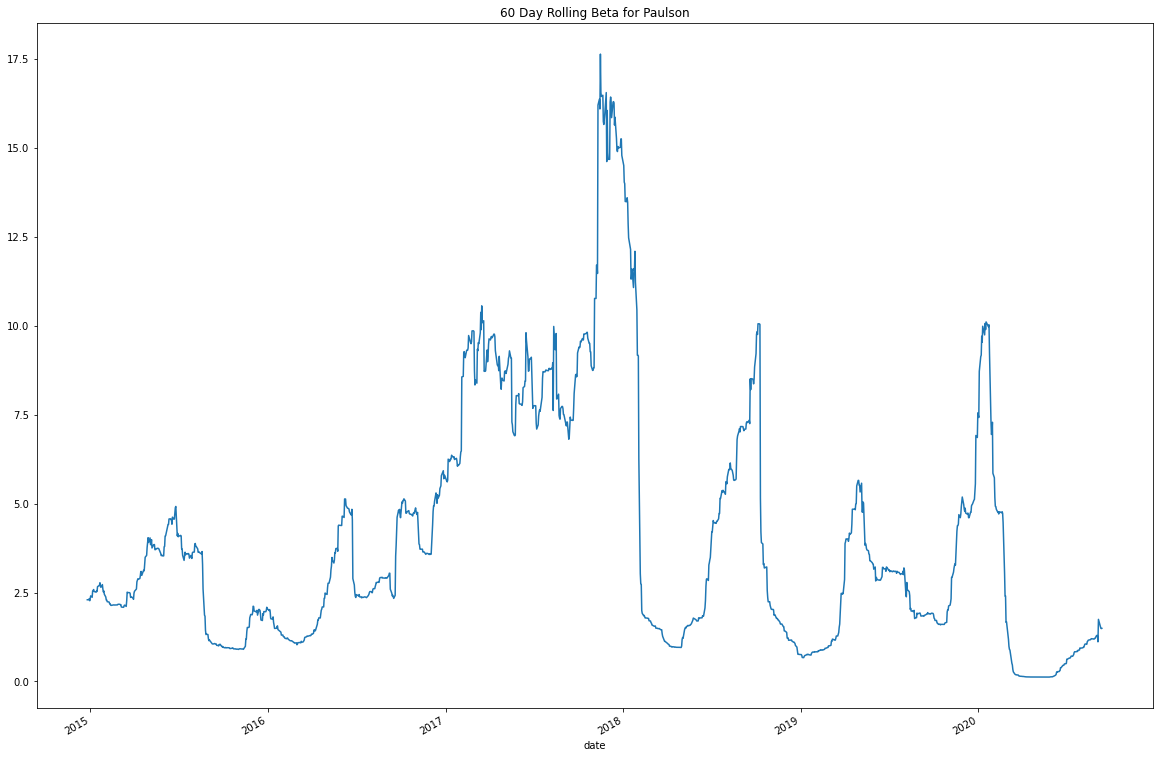

In [209]:
# Plot the rolling beta of the Paulson portfolio
# Include a title parameter and adjust the figure size

paulson_beta.plot(title="60 Day Rolling Beta for Paulson", figsize=(20,14))


In [208]:
# Calculate the covariance using a 60-day rolling window of the Berkshire portfolio
# Review the last five rows of the covariance data

berkshire_daily_returns = whale_navs_df["BERKSHIRE HATHAWAY INC"].pct_change().dropna()

berkshire_variance = berkshire_daily_returns.var()

berkshire_covariance = berkshire_daily_returns.rolling(window=60).var().cov(whale_navs_df["S&P 500"])

berkshire_covariance

0.000161150371896151

In [207]:
# Calculate the beta for the Berkshire portfolio based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information

berkshire_beta = (berkshire_daily_returns.rolling(window=60).var().cov(whale_navs_df["S&P 500"])) / sp500_variance

berkshire_beta.tail()


date
2020-09-04    1.567582
2020-09-08    1.394517
2020-09-09    1.341741
2020-09-10    1.334812
2020-09-11    1.340076
Name: S&P 500, dtype: float64

In [206]:
# Calculate the average of the 60-day rolling beta of the Berkshire Portfolio

berkshire_beta_average = berkshire_beta.mean()

berkshire_beta_average


3.624286254765954

<AxesSubplot:title={'center':'60 Day Rolling Beta for Berkshire Hathawayn'}, xlabel='date'>

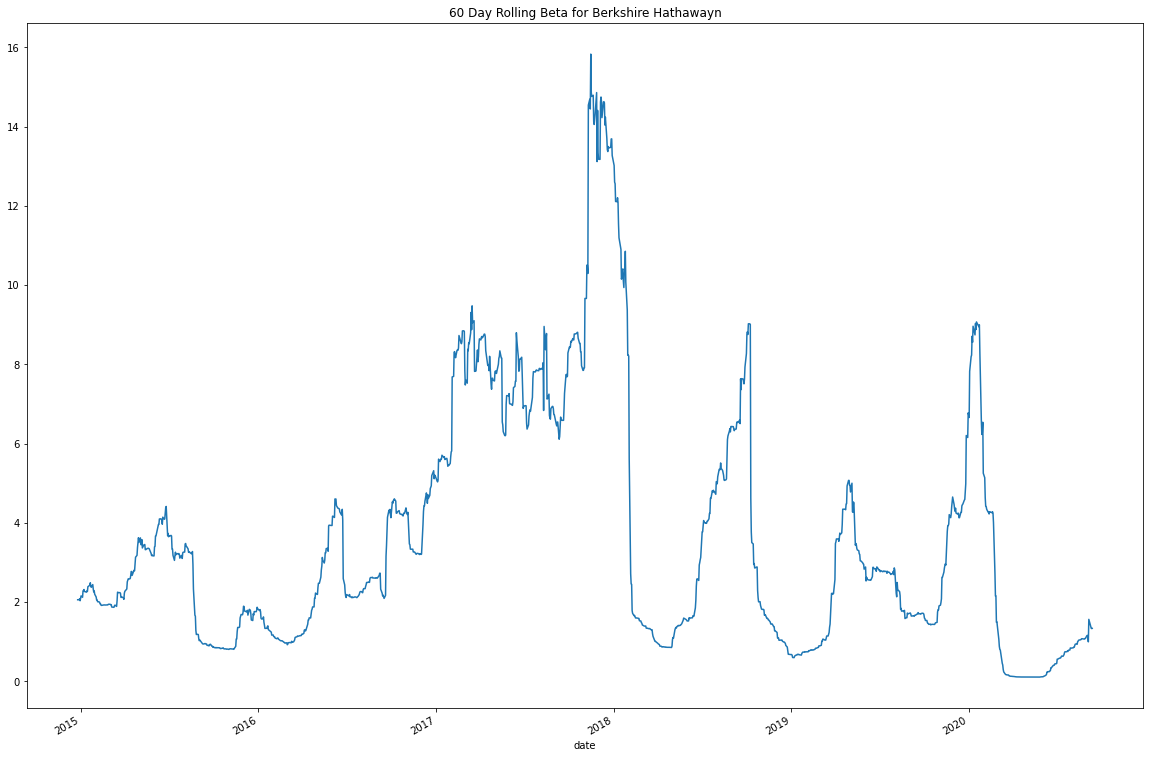

In [205]:
# Plot the rolling beta of the Berkshire Portfolio
# Include a title parameter and adjust the figure size

berkshire_beta.plot(title="60 Day Rolling Beta for Berkshire Hathawayn", figsize=(20,14))


**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Berkshire Hathaway's beta indicates it is more sensitive to the S&P 500 than Paulson's.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # Berkshire Hathaway

---